In [2]:
from model import create_model
from preprocess_input import smooth, buildData
import pandas as pd

Using TensorFlow backend.


In [3]:
model = create_model(85*14,85)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [4]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1190, 3)      0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 1190, 512)    532480      input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 85, 3)        0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 256), (None, 787456      bidirectional_1[0][0]            
____________________________________________________________________________________________

In [5]:
model.load_weights('./weights/seq2seq_14.h5')

In [0]:
data_2018 = pd.read_csv('./example/example_2018.csv',header=None).values
data_2019 = pd.read_csv('./example/example_2019.csv',header=None).values

In [0]:
data_2018 = data_2018.reshape(-1,85,1)
data_2019 = data_2019.reshape(-1,85,1)

In [0]:
data_2018_smooth = smooth(data_2018)
data_2019_smooth = smooth(data_2019)

In [0]:
X, X2, y = buildData(data_2019,data_2018)

In [10]:
X.shape, X2.shape, y.shape

((76, 1190, 3), (76, 85, 3), (76, 85, 1))

In [0]:
predict_result = model.predict([X, X2])

In [0]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

start_time = '05:00:00'
date_list= []
for i in range(85):
    date_list.append(datetime.datetime.strptime(start_time,'%H:%M:%S')
                     +datetime.timedelta(minutes=10*i))

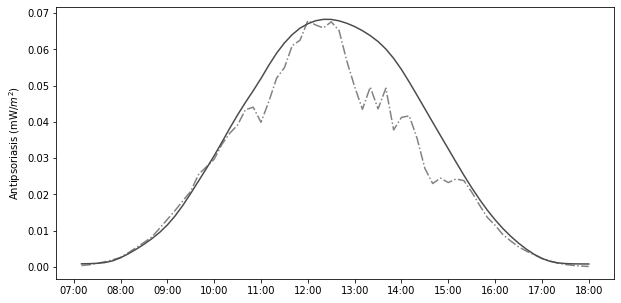

In [13]:
lines = []
day = 0
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(date_list[13:79],predict_result[day,13:79,:], alpha=0.7,linestyle='-', color='black',label="pred")
ax.plot(date_list[13:79],y[day].ravel()[13:79],linestyle='-.', alpha=0.7, color='#4d4d4d',label="real")
ax.set_ylabel('Antipsoriasis (mW/$m^{2}$)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
# ax2.set_ylabel('Error (%)')
ax.legend(lines, ['pred', 'real', 'error'],
      loc='upper right', frameon=False)
plt.show()